# CHAINLINK MARKET PRICE PREDICTION

In [1]:
import pandas as pd


clk = pd.read_csv('processed_data.csv', sep = '|')
clk.head()

,timestamp,date,hour,aux_hour,price,volume,side,avg_price_by_hour,std_price_by_hour
0,2021-04-24 00:00:07.440,2021-04-24,00:00:07,0,29.19000,60.36,sell,28.237243,0.434915
1,2021-04-24 00:00:09.953,2021-04-24,00:00:09,0,29.19000,45.64,sell,28.237243,0.434915
2,2021-04-24 00:00:16.813,2021-04-24,00:00:16,0,29.18802,30.70,buy,28.237243,0.434915
3,2021-04-24 00:00:20.042,2021-04-24,00:00:20,0,29.20000,20.00,sell,28.237243,0.434915
4,2021-04-24 00:00:20.386,2021-04-24,00:00:20,0,29.22945,0.23,sell,28.237243,0.434915


In [174]:
clk.iloc[430:640]

,timestamp,date,hour,aux_hour,price,volume,side,avg_price_by_hour,std_price_by_hour,price_l1,price_l2,price_l5
430,2021-04-24 00:59:44.505,2021-04-24,00:59:44,0,27.73048,34.80,buy,28.237243,0.434915,27.73048,27.73048,27.73048
431,2021-04-24 00:59:44.516,2021-04-24,00:59:44,0,27.73048,0.09,buy,28.237243,0.434915,27.73048,27.73048,27.73048
432,2021-04-24 01:00:18.210,2021-04-24,01:00:18,1,27.77744,10.09,buy,27.883028,0.077378,27.73048,27.73048,27.73048
433,2021-04-24 01:00:20.236,2021-04-24,01:00:20,1,27.77966,119.59,buy,27.883028,0.077378,27.77744,27.73048,27.73048
434,2021-04-24 01:03:16.433,2021-04-24,01:03:16,1,27.72422,75.00,sell,27.883028,0.077378,27.77966,27.77744,27.73048
...,...,...,...,...,...,...,...,...,...,...,...,...
635,2021-04-24 02:14:29.591,2021-04-24,02:14:29,2,27.17147,4.92,buy,27.542089,0.251502,27.17623,27.17622,27.23822
636,2021-04-24 02:14:29.591,2021-04-24,02:14:29,2,27.20000,0.07,buy,27.542089,0.251502,27.17147,27.17623,27.21094
637,2021-04-24 02:14:29.591,2021-04-24,02:14:29,2,27.20000,5.30,buy,27.542089,0.251502,27.20000,27.17147,27.16756
638,2021-04-24 02:14:29.591,2021-04-24,02:14:29,2,27.18537,19.51,buy,27.542089,0.251502,27.20000,27.20000,27.17622


Text(0.5, 1.0, 'Price and avg price over last 10000 Obs')

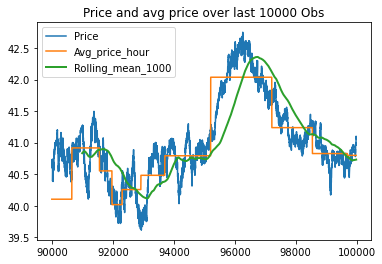

In [37]:
import matplotlib.pyplot as plt

x = 10000
plt.plot(clk['price'].tail(x))
plt.plot(clk['avg_price_by_hour'].tail(x))
plt.plot(clk['price'].tail(x).rolling(int(x/10)).mean(), linewidth = 2)
plt.legend(['Price', 'Avg_price_hour', 'Rolling_mean_1000'])
plt.title('Price and avg price over last ' + str(x) + ' Obs')

In [4]:
clk['price_l1'] = clk['price'].shift(1)
clk['price_l2'] = clk['price'].shift(2)
clk['price_l5'] = clk['price'].shift(5)

clk.head(6)

,timestamp,date,hour,aux_hour,price,volume,side,avg_price_by_hour,std_price_by_hour,price_l1,price_l2,price_l5
0,2021-04-24 00:00:07.440,2021-04-24,00:00:07,0,29.19000,60.36,sell,28.237243,0.434915,NaN,NaN,NaN
1,2021-04-24 00:00:09.953,2021-04-24,00:00:09,0,29.19000,45.64,sell,28.237243,0.434915,29.19000,NaN,NaN
2,2021-04-24 00:00:16.813,2021-04-24,00:00:16,0,29.18802,30.70,buy,28.237243,0.434915,29.19000,29.19000,NaN
3,2021-04-24 00:00:20.042,2021-04-24,00:00:20,0,29.20000,20.00,sell,28.237243,0.434915,29.18802,29.19000,NaN
4,2021-04-24 00:00:20.386,2021-04-24,00:00:20,0,29.22945,0.23,sell,28.237243,0.434915,29.20000,29.18802,NaN
5,2021-04-24 00:00:20.386,2021-04-24,00:00:20,0,29.24004,0.74,sell,28.237243,0.434915,29.22945,29.20000,29.19


In [5]:
clk.corr()

,aux_hour,price,volume,avg_price_by_hour,std_price_by_hour,price_l1,price_l2,price_l5
aux_hour,1.000000,-0.024141,0.000325,-0.024194,-0.008875,-0.024153,-0.024164,-0.024196
price,-0.024141,1.000000,-0.019137,0.997805,0.533855,0.999969,0.999951,0.999901
volume,0.000325,-0.019137,1.000000,-0.017977,0.001408,-0.019056,-0.019060,-0.019039
avg_price_by_hour,-0.024194,0.997805,-0.017977,1.000000,0.535030,0.997803,0.997800,0.997792
std_price_by_hour,-0.008875,0.533855,0.001408,0.535030,1.000000,0.533874,0.533891,0.533946
price_l1,-0.024153,0.999969,-0.019056,0.997803,0.533874,1.000000,0.999969,0.999918
price_l2,-0.024164,0.999951,-0.019060,0.997800,0.533891,0.999969,1.000000,0.999934
price_l5,-0.024196,0.999901,-0.019039,0.997792,0.533946,0.999918,0.999934,1.000000


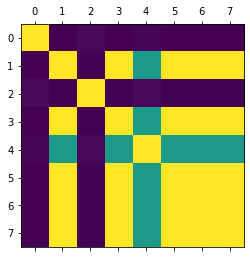

In [6]:
import matplotlib.pyplot as plt

plt.matshow(clk.corr())
plt.show()

In [11]:
clk.corr().loc['price']

aux_hour            -0.024141
price                1.000000
volume              -0.019137
avg_price_by_hour    0.997805
std_price_by_hour    0.533855
price_l1             0.999969
price_l2             0.999951
price_l5             0.999901
Name: price, dtype: float64

Strong Correlations with the lagged price. No significant differences between number of lagged events. This is why arima models might not work well

In [12]:
clk.head(2)

,timestamp,date,hour,aux_hour,price,volume,side,avg_price_by_hour,std_price_by_hour,price_l1,price_l2,price_l5
0,2021-04-24 00:00:07.440,2021-04-24,00:00:07,0,29.19,60.36,sell,28.237243,0.434915,NaN,NaN,NaN
1,2021-04-24 00:00:09.953,2021-04-24,00:00:09,0,29.19,45.64,sell,28.237243,0.434915,29.19,NaN,NaN


In [13]:
clk_dl = clk[['price_l1', 'price_l2', 'price_l5', 'volume',
       'avg_price_by_hour', 'std_price_by_hour', 'price']]

clk_dl = clk_dl.iloc[5:]
print(clk_dl.shape)
clk_dl.head(6)

(99981, 7)


,price_l1,price_l2,price_l5,volume,avg_price_by_hour,std_price_by_hour,price
5,29.22945,29.20000,29.19000,0.74,28.237243,0.434915,29.24004
6,29.24004,29.22945,29.19000,3.63,28.237243,0.434915,29.22000
7,29.22000,29.24004,29.18802,35.38,28.237243,0.434915,29.22000
8,29.22000,29.22000,29.20000,8.00,28.237243,0.434915,29.24020
9,29.24020,29.22000,29.22945,0.70,28.237243,0.434915,29.21231
10,29.21231,29.24020,29.24004,0.04,28.237243,0.434915,29.21231


## 1.- Time Series Preprocessing
### 1.1.- Scaling Data

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
v_sc = scaler.fit_transform(clk_dl[['price']].values)

print(v_sc.shape)
v_sc[:5], scaler.inverse_transform(v_sc[:5]), clk_dl[['price']].values[:5]

(99981, 1)


(array([[0.25102435],
        [0.24991338],
        [0.24991338],
        [0.25103322],
        [0.24948706]]),
 array([[29.24004],
        [29.22   ],
        [29.22   ],
        [29.2402 ],
        [29.21231]]),
 array([[29.24004],
        [29.22   ],
        [29.22   ],
        [29.2402 ],
        [29.21231]]))

In [67]:
import numpy as np

def make_simple_rolling_window(data, window: int):
    X,Y = [],[]
    for i in range(len(data)-window-1):
        X.append(data[i:(i+window),0])
        Y.append(data[(i+window),0])
    return np.array(X),np.array(Y)


In [68]:
x_w, y_w = make_simple_rolling_window(v_sc, window = 5)
cut = int(0.85*x_w.shape[0])

x_train, x_test = x_w[0:cut], x_w[cut:]
y_train, y_test = y_w[0:cut], y_w[cut:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((84978, 5), (14997, 5), (84978,), (14997,))

In [75]:
v_sc[:10], x_train[:5], y_train[:5]

(array([[0.25102435],
        [0.24991338],
        [0.24991338],
        [0.25103322],
        [0.24948706],
        [0.24948706],
        [0.24880462],
        [0.25216526],
        [0.25216471],
        [0.24926309]]),
 array([[0.25102435, 0.24991338, 0.24991338, 0.25103322, 0.24948706],
        [0.24991338, 0.24991338, 0.25103322, 0.24948706, 0.24948706],
        [0.24991338, 0.25103322, 0.24948706, 0.24948706, 0.24880462],
        [0.25103322, 0.24948706, 0.24948706, 0.24880462, 0.25216526],
        [0.24948706, 0.24948706, 0.24880462, 0.25216526, 0.25216471]]),
 array([0.24948706, 0.24880462, 0.25216526, 0.25216471, 0.24926309]))

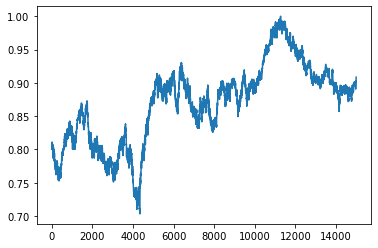

In [89]:
plt.plot(y_test)

## 2.- Deep Learning Modelling

### 2.0.- Creating some usefull functions and Keras Callbacks

In [85]:
import tensorflow as tf

class reduce_prints(tf.keras.callbacks.Callback):
    '''Function that will tell us wether the model is learning or not eventhough verbose is set to 0 in order
    to reduce prints and nb text'''
    def __init__(self, epochs):
        self.epochs = epochs
        print(f" Printing out results every {epochs} epochs")
    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.epochs ==0:
            print('Epoch {}: Average loss is {}, mean absolute error is {}.'.format(epoch, logs['loss'], logs['val_loss']))

def show_train(history):
    '''Function to display training process for model'''
    plt.figure(figsize=(5,3))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model MSE')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    print(" ")
    plt.figure(figsize=(5,3))
    plt.plot(history.history['lr'])
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


In [115]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 30, verbose = 1, restore_best_weights=True)
reducelr = ReduceLROnPlateau(monitor = 'val_loss', patience = 12, verbose = 1, factor = 0.5, min_lr = 1e-9)
cbs = [reducelr, early_stopping, reduce_prints(20)]

 Printing out results every 20 epochs


### 2.1.- Dense layers

On this approach we are just supossing that the value of the series at time t is a linear combination of its previous values.
$y(t) = a(xt_3) + b(xt_2) + c(xt_1)$. We have just to adjust these parameters in order to replicate the serie. The reason why this is clearly a linear model is because linear activations and relu are being used as activation functions.

Relu is said to work better than GELU, ELU, lRelu and Selu

Just because this a UNIVARIATE problem and we have seen that actual price is strongly correlated with lagged prices we will treat this problem as a it is, an Univariate Problem.


In [146]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(x_train.shape[1],))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)


model = keras.Model(inputs=inputs, outputs=outputs, name='dense_model')
model.summary()

Model: "dense_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_50 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [147]:
opt = keras.optimizers.Nadam(lr=0.01)
model.compile(loss='mean_squared_error', 
              optimizer=opt, metrics=["mean_absolute_error"])



history_dense1 = model.fit(x_train, y_train, validation_split=0.225, verbose = 0, epochs = 100, callbacks=cbs)
# test_scores = model.evaluate(x_test, y_test, verbose=2)
# print('Test loss:', test_scores[0])
# print('Test accuracy:', test_scores[1])


Epoch 0: Average loss is 0.0005979728884994984, mean absolute error is 0.0019607781432569027.
Epoch 20: Average loss is 1.534903458377812e-05, mean absolute error is 7.680459930270445e-06.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 40: Average loss is 3.81706740881782e-06, mean absolute error is 6.198515166033758e-06.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 60: Average loss is 3.0540752504748525e-06, mean absolute error is 6.911730906722369e-06.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 80: Average loss is 2.7451367259345716e-06, mean absolute error is 8.839694601192605e-06.

Epoch 00085: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.

Epoch 00097: ReduceLROnPlateau reducin

In [148]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

469/469 - 0s - loss: 6.1673e-06 - mean_absolute_error: 0.0018
Test loss: 6.1672590163652785e-06
Test accuracy: 0.0017545061418786645


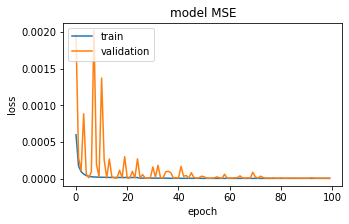

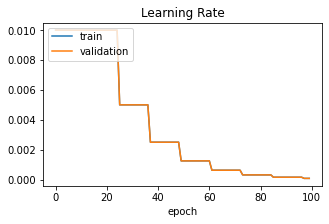

In [149]:
show_train(history_dense1)

Let us study the performance of the model on 2 different sequences

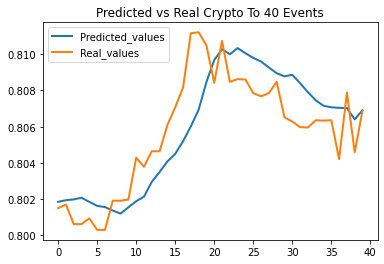

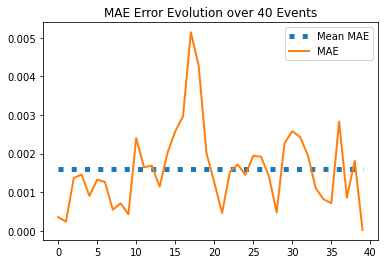

In [158]:
from IPython.display import clear_output


predicted, real, l_errors = list(), list(), list()
events_to_forecast = 40

seq_ini = 0
current_seq = x_test[seq_ini]


for obs in range(events_to_forecast):
    pred = model.predict(current_seq.reshape(1, 5))[0]
    predicted.append(pred[0])
    real.append(y_test[obs])
    current_seq = np.concatenate([x_test[seq_ini + 1][:-1], pred])
    seq_ini += 1
    l_errors.append(abs(pred - y_test[obs]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    clear_output(wait=True)
    plt.show()
    
plt.title('MAE Error Evolution over ' + str(events_to_forecast) + ' Events')
plt.plot(range(events_to_forecast), [np.array(l_errors).mean() for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
plt.plot(l_errors, linewidth = 2)
plt.legend(['Mean MAE', 'MAE'])
plt.show()

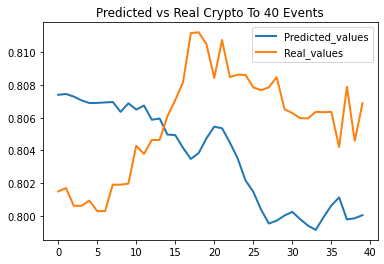

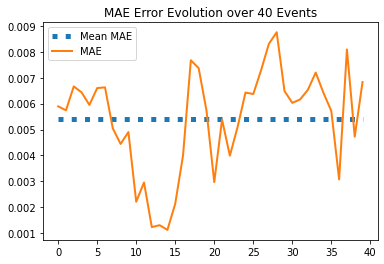

In [157]:
from IPython.display import clear_output


predicted, real, l_errors = list(), list(), list()
events_to_forecast = 40

seq_ini = 30
current_seq = x_test[seq_ini]


for obs in range(events_to_forecast):
    pred = model.predict(current_seq.reshape(1, 5))[0]
    predicted.append(pred[0])
    real.append(y_test[obs])
    current_seq = np.concatenate([x_test[seq_ini + 1][:-1], pred])
    seq_ini += 1
    l_errors.append(abs(pred - y_test[obs]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    clear_output(wait=True)
    plt.show()
    
plt.title('MAE Error Evolution over ' + str(events_to_forecast) + ' Events')
plt.plot(range(events_to_forecast), [np.array(l_errors).mean() for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
plt.plot(l_errors, linewidth = 2)
plt.legend(['Mean MAE', 'MAE'])
plt.show()

In [255]:
def make_simple_rolling_window(a, window: int):
    ''' This function "windows" a time Series Array.'''
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    vn = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    x_w, y_w = vn[:, :window-1], vn[:, window-1]
    print(f"Splitted Sequences {x_w.shape}, {y_w.shape}")
    return x_w, y_w

In [112]:
def make_model(x_train):
    inputs = keras.Input(shape=(x_train.shape[1],))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    opt = keras.optimizers.Nadam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=["mean_absolute_error"])
    return model

In [176]:
def plot_model(model, x_test, y_test, window: int , events_to_forecast: int = 50, seq_ini: int = 0):
    predicted, real, l_errors = list(), list(), list()
    current_seq = x_test[seq_ini]
    for obs in range(events_to_forecast):
        pred = model.predict(current_seq.reshape(1, window))[0]
        predicted.append(pred[0])
        real.append(y_test[seq_ini + obs])
        current_seq = np.concatenate([x_test[obs + 1][:-1], model.predict(current_seq.reshape(1, window))[0]])
        l_errors.append(abs(pred - y_test[obs]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    plt.show()
    plt.title('MAError Evolution ' + str(events_to_forecast) + ' Events')
    mae_error = np.array(l_errors).mean()
    print("MAE error ---> ", mae_error)
    plt.plot(range(events_to_forecast), [mae_error for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
    plt.plot(l_errors, linewidth = 2)
    plt.legend(['Mean MAE', 'MAE'])
    plt.show()

In [276]:
def plot_model(model, x_test, y_test, window , events_to_forecast: int = 50):
    predicted, real, l_errors = list(), list(), list()
    for index, serie in enumerate(x_test[:events_to_forecast]):
        p = model.predict(serie.reshape(1, window))[0][0]
        predicted.append(p)
        real.append(y_test[index])
        l_errors.append(abs(p - y_test[index]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    plt.show()
    plt.title('MAError Evolution ' + str(events_to_forecast) + ' Events')
    mae_error = np.array(l_errors).mean()
    print("MAE error ---> ", mae_error)
    plt.plot(range(events_to_forecast), [mae_error for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
    plt.plot(l_errors, linewidth = 2)
    plt.legend(['Mean MAE', 'MAE'])
    plt.show()


In [116]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, min_lr=0.00001, verbose=0)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 25)

# from tensorflow.keras.callbacks import Callback
# class Aux_Process_Callback(Callback):
#     def on_epoch_begin(self, epoch, logs=None):
#         if epoch % 25 == 0:
#             print(f"Starting epoch {epoch}")
            
# cbs = [reduce_lr, es, Aux_Process_Callback()]

 Training model with a window lenght of ---> 4
 Training Dense Model with (84979, 4) samples for train and (14997, 4) samples for testing
Epoch 0: Average loss is 0.000356527219992131, mean absolute error is 4.782859468832612e-05.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 20: Average loss is 5.071843133919174e-06, mean absolute error is 8.343591616721824e-06.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 40: Average loss is 3.0127687296044314e-06, mean absolute error is 9.755020982993301e-06.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.


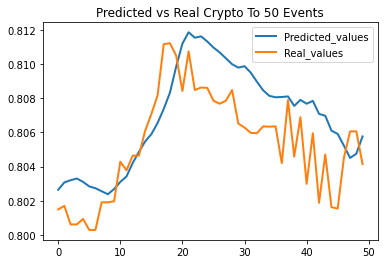

MAE error --->  0.0021506476


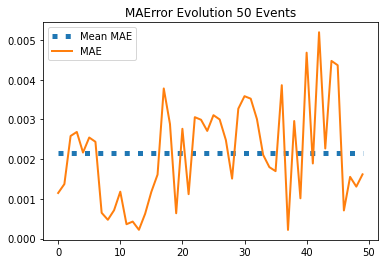

 Window 4 finished
 
 Training model with a window lenght of ---> 5
 Training Dense Model with (84978, 5) samples for train and (14997, 5) samples for testing
Epoch 0: Average loss is 0.00041498802602291107, mean absolute error is 8.941385203797836e-06.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 20: Average loss is 4.969650035491213e-06, mean absolute error is 9.896868868963793e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Restoring model weights from the end of the best epoch.
Epoch 00031: early stopping


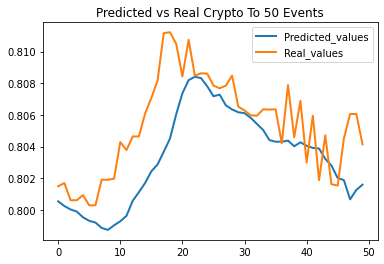

MAE error --->  0.0022394978


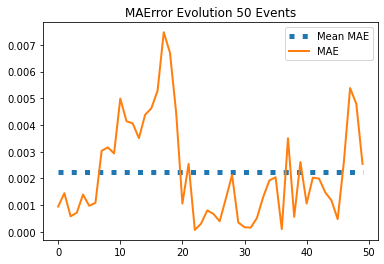

 Window 5 finished
 
 Training model with a window lenght of ---> 6
 Training Dense Model with (84977, 6) samples for train and (14997, 6) samples for testing
Epoch 0: Average loss is 0.00046882170136086643, mean absolute error is 0.0012453751405701041.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 20: Average loss is 6.05262175668031e-06, mean absolute error is 6.456351457018172e-06.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 40: Average loss is 3.1310837584896944e-06, mean absolute error is 6.715181825711625e-06.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.


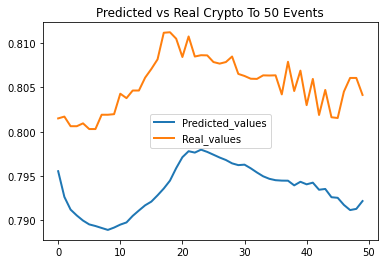

MAE error --->  0.011820739


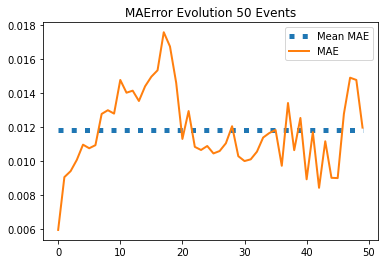

 Window 6 finished
 
 Training model with a window lenght of ---> 7
 Training Dense Model with (84977, 7) samples for train and (14996, 7) samples for testing
Epoch 0: Average loss is 0.000444694742327556, mean absolute error is 5.291695924825035e-05.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 20: Average loss is 5.01545855513541e-06, mean absolute error is 7.756916602374986e-06.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 40: Average loss is 2.951605210910202e-06, mean absolute error is 5.21737129020039e-05.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.


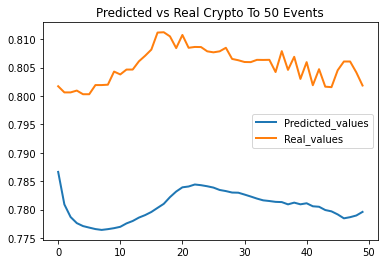

MAE error --->  0.024752822


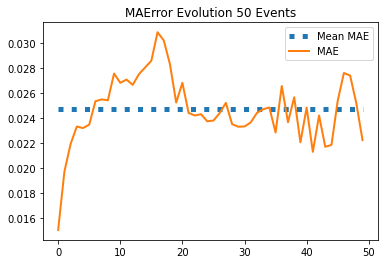

 Window 7 finished
 


In [130]:
def model_with_window(data, window: int, cbs, vcut: int = 0.85, epochs: int = 100, n_events: int = 50):
    print(f" Training model with a window lenght of ---> {window}")
    x_w, y_w = make_simple_rolling_window(data, window)
    cut = int(vcut*x_w.shape[0])
    x_train, x_test = x_w[0:cut], x_w[cut:]
    y_train, y_test = y_w[0:cut], y_w[cut:]
    model = make_model(x_train)
    print(f" Training Dense Model with {x_train.shape} samples for train and {x_test.shape} samples for testing")
    model.fit(x_train, y_train, validation_split=0.225, epochs=epochs, callbacks=cbs, verbose = 0)
    plot_model(model, x_test, y_test, window = window , events_to_forecast=n_events)
    print(f" Window {window} finished")
    print(" ")

    
for window_lenght in range(4,8):
    model_with_window(v_sc, window_lenght, cbs, epochs = 50, n_events = 50)   

### Effects of the window lenght

We are studying the impact of chosing different windows for the same starting sequence.
We can see the MAE error increases exponentially with the length of the window. Next step is to try Recurrent Neural Networks.

Text(0.5, 1.0, ' Error vs window lenght')

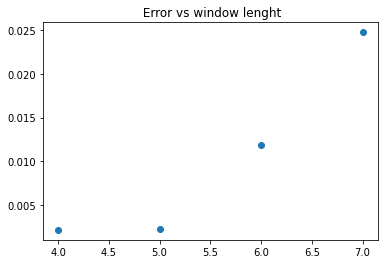

In [138]:
ws = range(4,8)
er = [0.0021506476, 0.0022394978, 0.011820739,  0.024752822]
plt.scatter(ws, er)
plt.title(' Error vs window lenght')

### 2.1.1.- Effects of using different activations functions that are not linear.

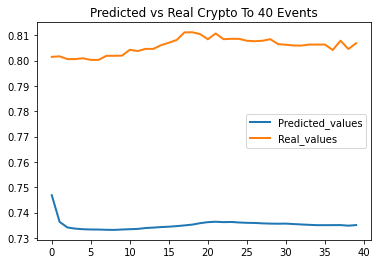

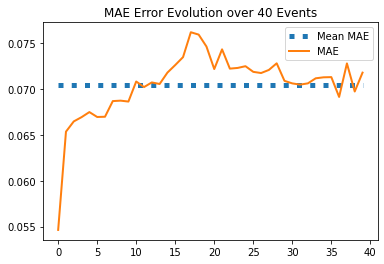

In [163]:
inputs = keras.Input(shape=(x_train.shape[1],))
x = layers.Dense(64, activation='sigmoid')(inputs)
x = layers.Dense(32, activation='sigmoid')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)


model = keras.Model(inputs=inputs, outputs=outputs, name='dense_model_not_linear')
opt = keras.optimizers.Nadam(lr=0.01)
model.compile(loss='mean_squared_error', 
              optimizer=opt, metrics=["mean_absolute_error"])



history_dense_sf1 = model.fit(x_train, y_train, validation_split=0.225, verbose = 0, epochs = 100, callbacks=cbs)
test_scores = model.evaluate(x_test, y_test, verbose=2)



from IPython.display import clear_output


predicted, real, l_errors = list(), list(), list()
events_to_forecast = 40

seq_ini = 0
current_seq = x_test[seq_ini]


for obs in range(events_to_forecast):
    pred = model.predict(current_seq.reshape(1, 5))[0]
    predicted.append(pred[0])
    real.append(y_test[obs])
    current_seq = np.concatenate([x_test[seq_ini + 1][:-1], pred])
    seq_ini += 1
    l_errors.append(abs(pred - y_test[obs]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    clear_output(wait=True)
    plt.show()
    
plt.title('MAE Error Evolution over ' + str(events_to_forecast) + ' Events')
plt.plot(range(events_to_forecast), [np.array(l_errors).mean() for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
plt.plot(l_errors, linewidth = 2)
plt.legend(['Mean MAE', 'MAE'])
plt.show()

In [162]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

469/469 - 0s - loss: 0.0085 - mean_absolute_error: 0.0823
Test loss: 0.008480166085064411
Test accuracy: 0.08228638768196106


As we can see not linear functions increase the error by 4 times, from 1e-5 to 1e-4

### 2.1.2.- Effects of adding other variables to the linear model.

If we want to predict future data and we have past data available we can always compute representative params to be used to predict.

In [165]:
avg_std = clk[['avg_price_by_hour', 'std_price_by_hour', ]]

Index(['timestamp', 'date', 'hour', 'aux_hour', 'price', 'volume', 'side',
       'avg_price_by_hour', 'std_price_by_hour', 'price_l1', 'price_l2',
       'price_l5'],
      dtype='object')

After some reflection time this idea has been neglected. There is no point in doing this. Firstly, to compute the average of the price in the hour we need the data of the whole hour. On top of that, we could do something like shifting the average price per hour and use the average price of the last previous hour, but this is like adding one random value from some events in the past. Just because there is no memory on dense layers this is not going to work as one could intuitively think.

### 2.2.- RNNs. Vanilla LSTM layer.

This layers are supossed to perform better using multiple timesteps. We are going to use 4 as window lenght

inputs: A 3D tensor with shape [batch, timesteps, feature].

We are on a univariate time series problem, so feature = 1 and timesteps are the columns of our data and batch is equal to our data lenght, but this param does not need to be specified.

In [185]:
from tensorflow.keras.layers import LSTM, Dense

inputs = keras.Input(shape = (x_train.shape[1],1))
lstm1 = LSTM(256, activation= 'relu', return_sequences=False)(inputs)
outputs = Dense(1, activation = 'relu')(lstm1)

model_v_lstm = keras.Model(inputs=inputs, outputs=outputs, name='dense_model')
opt = keras.optimizers.Nadam(lr=0.01)
model_v_lstm.compile(loss='mean_squared_error', 
              optimizer=opt, metrics=["mean_absolute_error"])

history_v_lstm = model_v_lstm.fit(x_train, y_train, validation_split=0.225, verbose = 0, epochs = 100, callbacks=cbs)


show_train(history_dense1)

Epoch 0: Average loss is 0.12329160422086716, mean absolute error is 0.41312551498413086.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 20: Average loss is 0.12329155951738358, mean absolute error is 0.41312551498413086.


KeyboardInterrupt: 

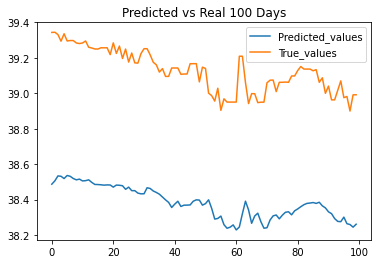

In [77]:
from IPython.display import clear_output


predicted, real, l_errors = list(), list(), list()
events_to_forecast = 40

seq_ini = 30
current_seq = x_test[seq_ini]


for obs in range(events_to_forecast):
    pred = model.predict(current_seq.reshape(1, 5))[0]
    predicted.append(pred[0])
    real.append(y_test[obs])
    current_seq = np.concatenate([x_test[seq_ini + 1][:-1], pred])
    seq_ini += 1
    l_errors.append(abs(pred - y_test[obs]))
    plt.plot(predicted, linewidth = 2)
    plt.plot(real, linewidth = 2)
    plt.title('Predicted vs Real Crypto To ' + str(events_to_forecast) + ' Events')
    plt.legend(['Predicted_values', 'Real_values'])
    clear_output(wait=True)
    plt.show()
    
plt.title('MAE Error Evolution over ' + str(events_to_forecast) + ' Events')
plt.plot(range(events_to_forecast), [np.array(l_errors).mean() for i in range(events_to_forecast)], linestyle = 'dotted',
        linewidth = 5)
plt.plot(l_errors, linewidth = 2)
plt.legend(['Mean MAE', 'MAE'])
plt.show()

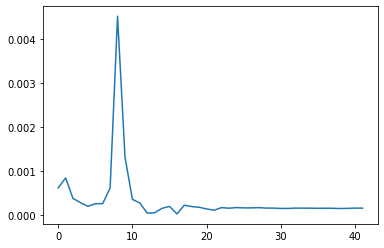

In [60]:
def plot_hist(history, tipo = 0):
# list all data in history
    if tipo == 0:
        print(f" Ultimo error en conjunto de val ---> {history.history['val_mean_absolute_error'][-1]*y_sc.max()}")
    else:
        print(f" Ultimo error en conjunto de val ---> {history.history['val_mean_absolute_error'][-1]*y_sc_rnn.max()}")
    import matplotlib.pylab as pylab
    pylab.rcParams['figure.figsize'] = 12, 5
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['lr'])
    plt.title('Learning Rate')
    plt.ylabel('lr')
    plt.xlabel('epoch')
    plt.legend(['lr'], loc='upper left')
    plt.show()
plot_hist(history_dnn)

In [186]:
j1 = {
 "flower": {
    "price": {
        "type": "good",
        "value": 5282.0,
        "direction": "up"
    }
   },
 "furniture": {
    "price": {
        "type": "comfy",
        "value": 9074.0,
        "direction": "down"
    }
   }
 }
j2 = {
 "flower": {
    "price": {
        "type": "good",
        "value": 827.0,
        "direction": "up"
    }
   },
 "furniture": {
    "price": {
        "type": "comfy",
        "value": 468.0,
        "direction": "down"
    }
   }
 }

In [196]:
v1s = [j1['flower']['price']['value'], j1['furniture']['price']['value']]
v2s = [j2['flower']['price']['value'], j2['furniture']['price']['value']]
index = ['flower', 'furniture']

pd.DataFrame({'value1': v1s, 'value2': v2s, 'key': index}).set_index('key')

,value1,value2
key,,
flower,5282.0,827.0
furniture,9074.0,468.0
